In [1]:
import os
from dotenv import load_dotenv
import mlflow

# Load environment variables from .env file
load_dotenv()
print(os.getenv('AWS-MLFLOW'))
# Get the AWS MLflow URI from .env file
aws_mlflow_uri = os.getenv('AWS-MLFLOW')

mlflow.set_tracking_uri(aws_mlflow_uri)

with mlflow.start_run():
    mlflow.log_param("param1", 15)
    mlflow.log_metric("metric1", 0.89)

http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/
🏃 View run efficient-sheep-517 at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/0/runs/d729e7f3cad24b05825ea66a6e6dcc35
🧪 View experiment at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/0


In [2]:
mlflow.set_experiment('Exp 2 - BoW vs TfIdf')

2025/07/05 14:01:50 INFO mlflow.tracking.fluent: Experiment with name 'Exp 2 - BoW vs TfIdf' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://ytsentimentarif/152602576301729546', creation_time=1751713309097, experiment_id='152602576301729546', last_update_time=1751713309097, lifecycle_stage='active', name='Exp 2 - BoW vs TfIdf', tags={}>

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [5]:
data = pd.read_csv('reddit_preprocessed.csv').dropna(subset=['clean_comment'])
data.shape

(36878, 2)

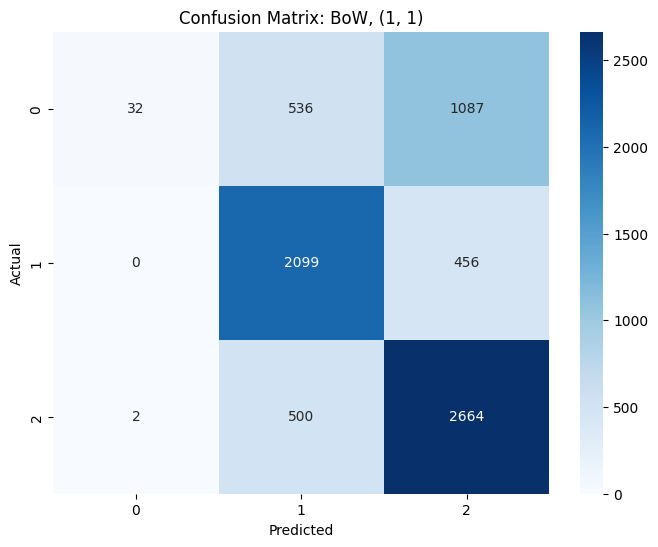

2025/07/05 15:00:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 15:00:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW_(1, 1)_RandomForest at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546/runs/a9a020f9e58a41998b778e0bc956b4a7
🧪 View experiment at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546


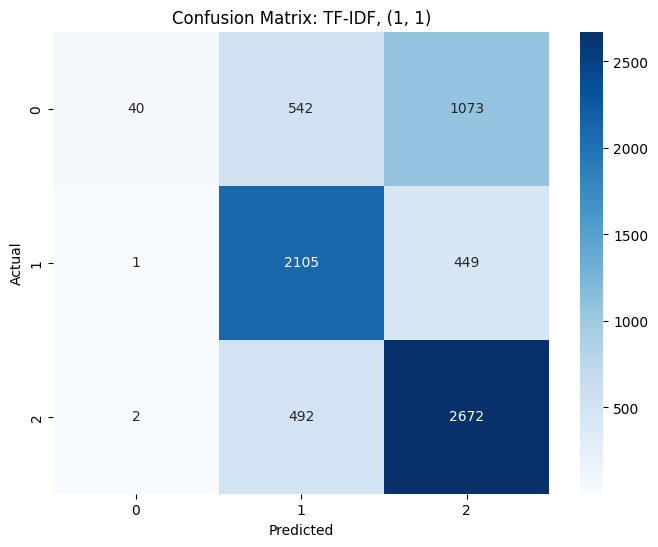

2025/07/05 15:03:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 15:03:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF_(1, 1)_RandomForest at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546/runs/c0a438c988e949408facb77516cf5f80
🧪 View experiment at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546


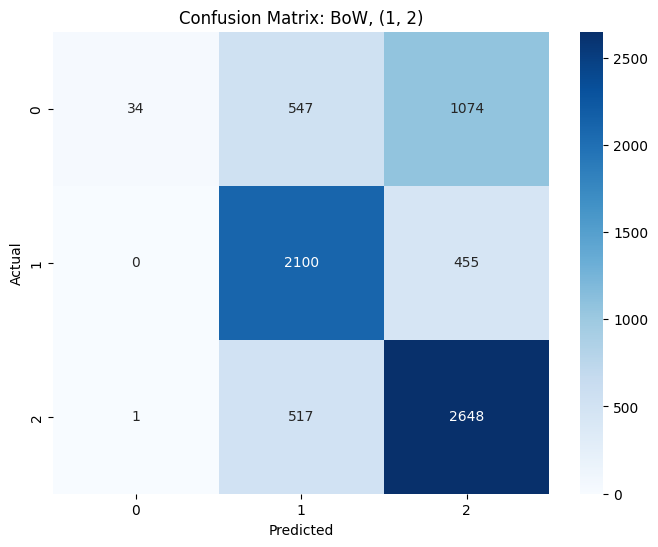

2025/07/05 15:04:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 15:04:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW_(1, 2)_RandomForest at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546/runs/e142bf17c03f417c917b90b2c9d41705
🧪 View experiment at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546


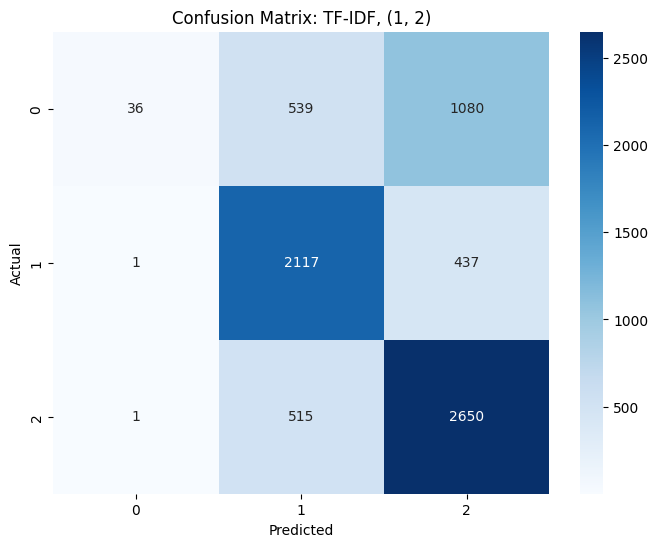

2025/07/05 15:06:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 15:06:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF_(1, 2)_RandomForest at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546/runs/cb7dcf373cf4490b94e25345642faa5e
🧪 View experiment at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546


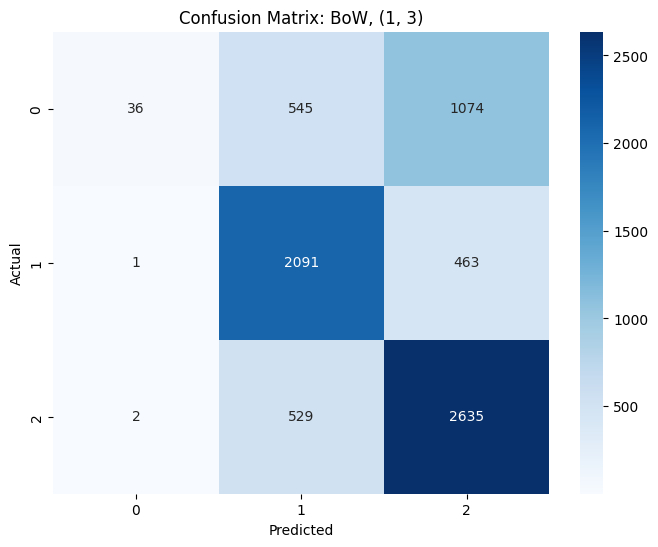

2025/07/05 15:07:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 15:07:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW_(1, 3)_RandomForest at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546/runs/6ed39b8c45f84748a7136fcefdda3058
🧪 View experiment at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546


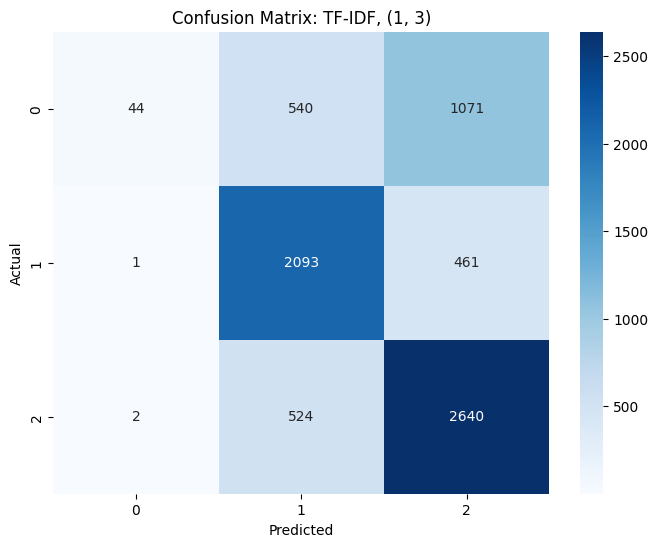

2025/07/05 15:08:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/05 15:08:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF_(1, 3)_RandomForest at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546/runs/df412b33f59e454fa2a589bd738bb962
🧪 View experiment at: http://ec2-54-86-71-188.compute-1.amazonaws.com:5000/#/experiments/152602576301729546


In [15]:
def run_experiment(vectorizer_type, ngram_range, vectorizer_max_features, vectorizer_name):
    if vectorizer_type == 'BoW':
        vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)
    else:
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)
    X_train, X_test, y_train, y_test = train_test_split(data['clean_comment'], data['category'], test_size=0.2, random_state=42, stratify=data['category'])

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    with mlflow.start_run() as run:
        mlflow.set_tag('mlflow.runName', f"{vectorizer_name}_{ngram_range}_RandomForest")
        mlflow.set_tag('experiment_type', 'feature_engineering')
        mlflow.set_tag('model_type', 'RandomForestClassifier')

        mlflow.set_tag('description', f"RandomForest with {vectorizer_name}, ngram_range={ngram_range}, max_features={vectorizer_max_features}")

        mlflow.log_param('vectorizer_type', vectorizer_type)
        mlflow.log_param('ngram_range', ngram_range)
        mlflow.log_param('vectorizer_max_features', vectorizer_max_features)

        n_estimators = 200
        max_depth = 15

        mlflow.log_param('n_estimators', n_estimators)
        mlflow.log_param('max_depth', max_depth)

        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        mlflow.log_metric('accuracy', accuracy)

        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        for label, metrics in classification_rep.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}", value)

        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f"Confusion Matrix: {vectorizer_name}, {ngram_range}")
        plt.show()
        plt.close()

        mlflow.sklearn.log_model(model, f"random_forest_model_{vectorizer_name}_{ngram_range}")

ngram_ranges = [(1, 1), (1, 2), (1, 3)]
max_features = 5000

for ngram_range in ngram_ranges:
    run_experiment("BoW", ngram_range, max_features, vectorizer_name="BoW")

    run_experiment("TF-IDF", ngram_range, max_features, vectorizer_name="TF-IDF")